In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
import seaborn as sns
import warnings

In [3]:
data = pd.read_csv("spam.csv", encoding='latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
#The dataset contains two relevant columns:
#v1: The label (either "ham" for legitimate messages or "spam" for spam messages).
#v2: The message text.
#The other columns (Unnamed: 2, Unnamed: 3, and Unnamed: 4) seem to contain only NaN values and are not relevant.

In [5]:
# Keep only relevant columns and rename them
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# Display the first few rows of the cleaned dataset
data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


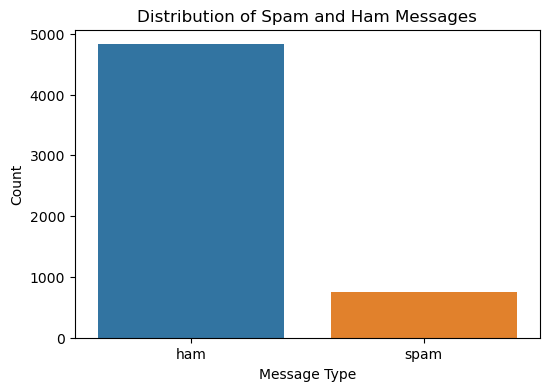

In [6]:
# Bar plot for the distribution of spam and ham messages
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


In [7]:
from wordcloud import WordCloud
# Generate word clouds for spam and ham messages
spam_words = ' '.join(data[data['label'] == 'spam']['message'])
ham_words = ' '.join(data[data['label'] == 'ham']['message'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)



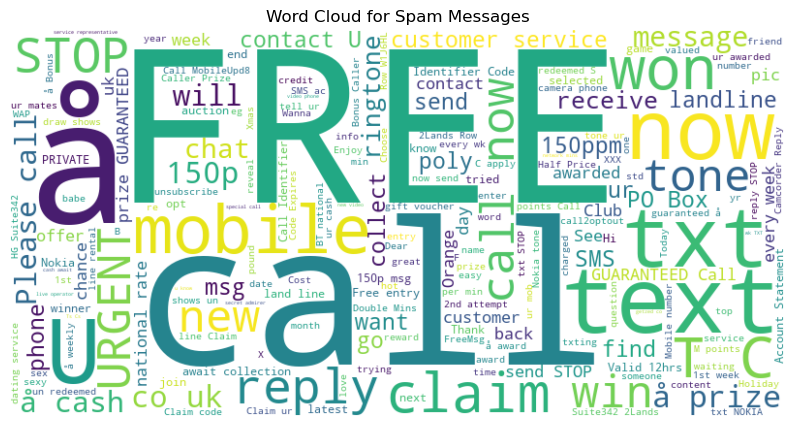

In [8]:
# Display the word cloud for spam messages
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()



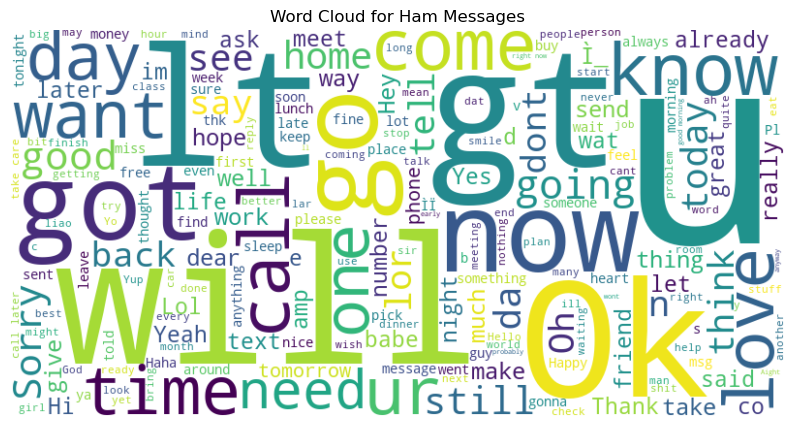

In [9]:
# Display the word cloud for ham messages
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2136\3544654697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message_length'] = data['message'].apply(len)
D:\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


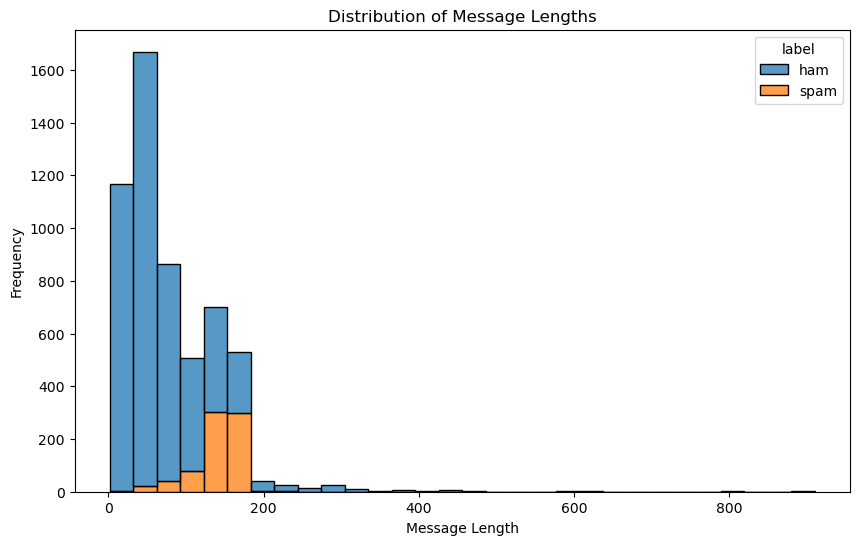

In [10]:
# Calculate message lengths
data['message_length'] = data['message'].apply(len)

# Histogram of message lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='message_length', hue='label', multiple='stack', bins=30)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

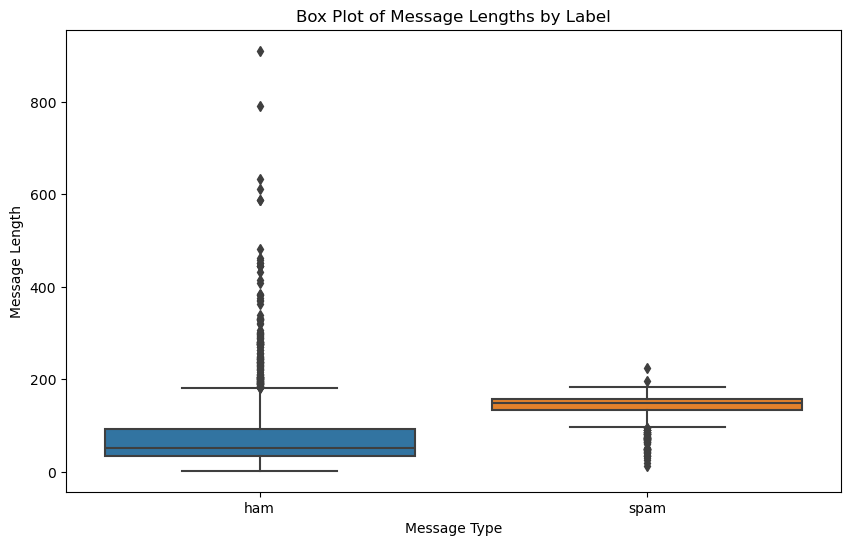

In [11]:
# Box plot of message lengths
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='message_length', data=data)
plt.title('Box Plot of Message Lengths by Label')
plt.xlabel('Message Type')
plt.ylabel('Message Length')
plt.show()


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Function to plot top N words
def plot_top_n_words(data, label, n=20):
    messages = data[data['label'] == label]['message']
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(messages)
    word_counts = np.asarray(X.sum(axis=0)).flatten()
    words = vectorizer.get_feature_names_out()
    
    word_count_df = pd.DataFrame({'word': words, 'count': word_counts})
    top_n_words = word_count_df.nlargest(n, 'count')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_n_words, x='count', y='word')
    plt.title(f'Top {n} Words in {label.capitalize()} Messages')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()



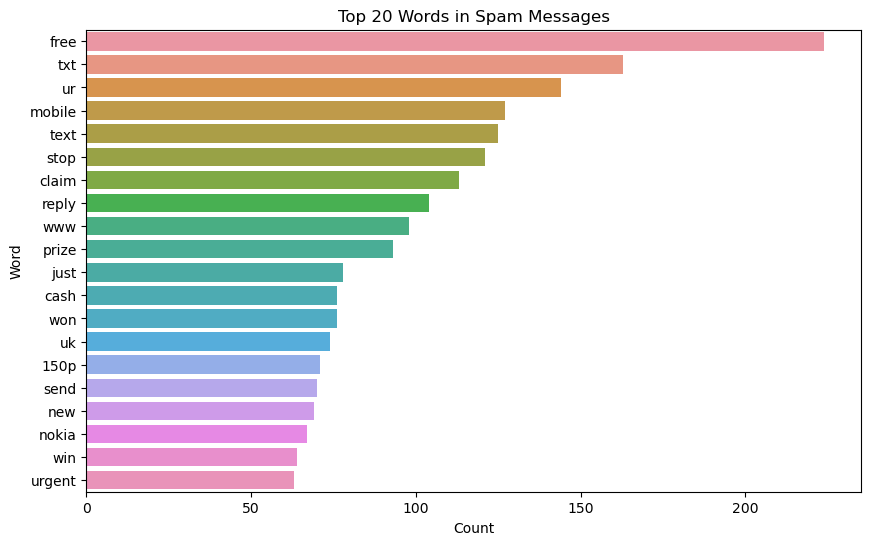

In [13]:
# Plot top 20 words in spam messages
plot_top_n_words(data, 'spam', 20)



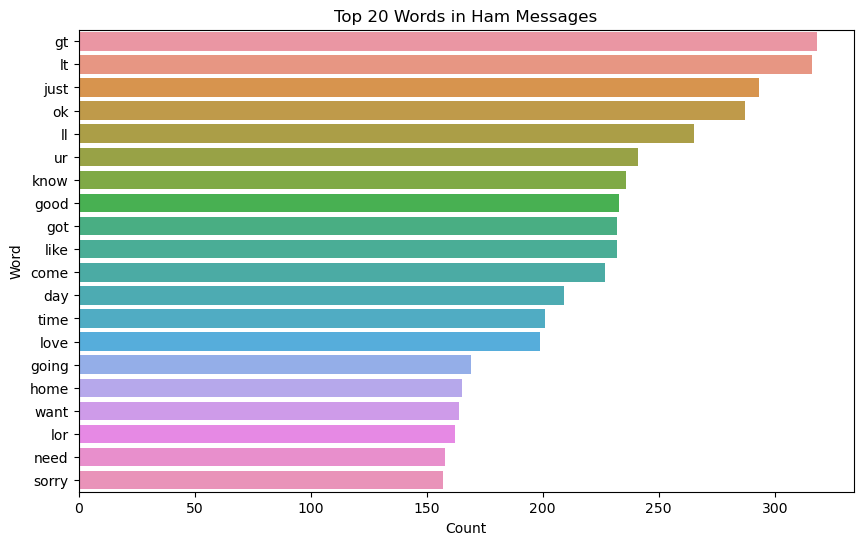

In [14]:
# Plot top 20 words in ham messages
plot_top_n_words(data, 'ham', 20)


In [15]:
#Next, let's proceed with the following steps:
#1-Preprocess the text data.
#2-Convert the text data into numerical features using techniques like TF-IDF.
#3-Split the dataset into training and testing sets.
#4-Train and evaluate different classifiers such as Naive Bayes, Logistic Regression, and Support Vector Machines (SVM).

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(1978    No I'm in the same boat. Still here at my moms...
 3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
 3935       They r giving a second chance to rahul dengra.
 4078       O i played smash bros  &lt;#&gt;  religiously.
 4086    PRIVATE! Your 2003 Account Statement for 07973...
                               ...                        
 3772    I came hostel. I m going to sleep. Plz call me...
 5191                               Sorry, I'll call later
 5226        Prabha..i'm soryda..realy..frm heart i'm sory
 5390                           Nt joking seriously i told
 860                   In work now. Going have in few min.
 Name: message, Length: 4457, dtype: object,
 3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
 944     I sent my scores to sophas and i had to do sec...
 1044    We know someone who you know that fancies you....
 2484    Only if you promise your getting out as SOON a...
 812     Congratulations ur awarded either å£500 of CD ...
           

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)


In [19]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)


In [20]:
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", nb_report)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)


Naive Bayes Accuracy: 0.9623318385650225
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

SVM Accuracy: 0.9820627802690582
SVM Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<Figure size 800x600 with 0 Axes>

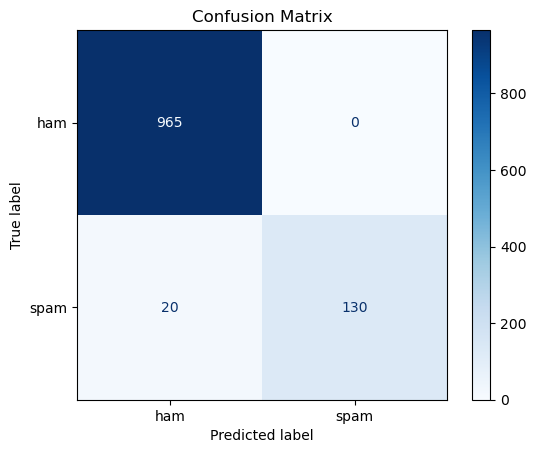

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, svm_predictions, labels=svm_classifier.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


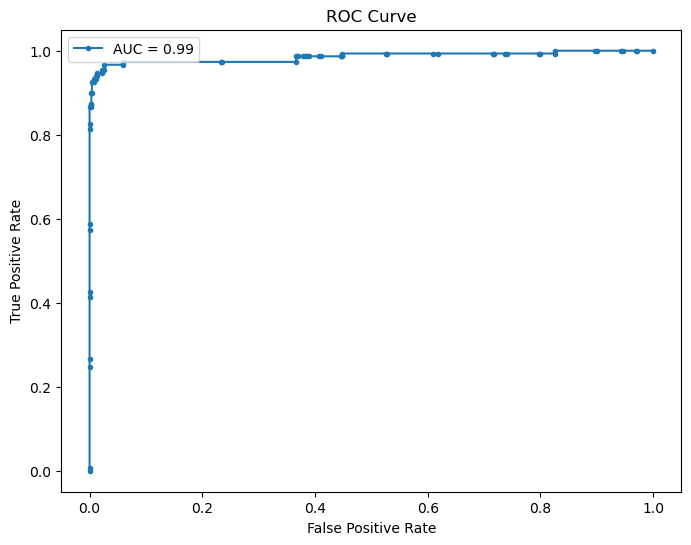

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
y_prob = svm_classifier.decision_function(X_test_tfidf)
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='spam')

# Compute AUC
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend([f'AUC = {auc:.2f}'])
plt.show()


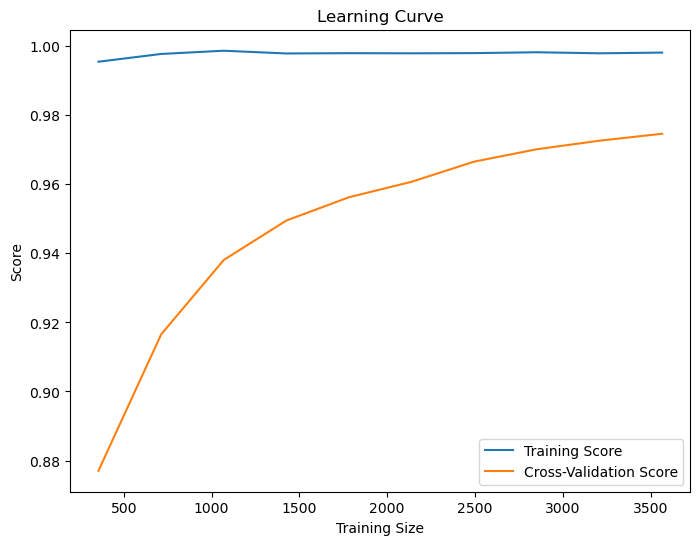

In [23]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    SVC(), X_train_tfidf, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()
